In [3]:
import pandas as pd
import sys, getopt, random
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from Kmeans import KMeans_Clustering

In [4]:
X_train = pd.read_csv("data/mnist_train.csv")

y_train = X_train['label'].copy()
labels = X_train['label'].copy()
X_train.drop('label', axis=1, inplace=True)

In [8]:
kmeans = KMeans(10)
kmeans.fit(X_train)
kmeansLabels = kmeans.predict(X_train)

samples = 300
sc = plt.scatter(X_train[:samples,0],
            X_train[:samples,1], 
            cmap=plt.cm.get_cmap('nipy_spectral', 10),
            c=kmeansLabels[:samples])

plt.colorbar()
# Etiqueta numérica: clase 
for i in range(samples):
    plt.text(X_train[i,0], X_train[i,1], y_train[i])

plt.show()
X_set = X_train

c:\Users\alberto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


InvalidIndexError: (slice(None, 300, None), 0)

In [5]:
silhouette_avg = silhouette_score(X_set, kmeansLabels)
print("Puntuación de Silueta:", silhouette_avg)

Puntuación de Silueta: 0.42051107


In [6]:
cluster_to_class = {}
for cluster_id in range(n_clusters):
    cluster_indices = np.where(kmeansLabels == cluster_id)[0]
    true_labels = y_train.iloc[cluster_indices].values
    most_common_label = np.bincount(true_labels).argmax()
    cluster_to_class[cluster_id] = most_common_label

reassigned_labels: np.ndarray = np.vectorize(cluster_to_class.get)(kmeansLabels)

print("kmeansLabels:\t\t", kmeansLabels, "\t", kmeansLabels.shape, type(kmeansLabels))
print("reassignedLabels:\t", reassigned_labels, "\t", reassigned_labels.shape, type(reassigned_labels))

kmeansLabels:		 [0 1 8 ... 0 4 6] 	 (60000,) <class 'numpy.ndarray'>
reassignedLabels:	 [5 0 4 ... 5 6 8] 	 (60000,) <class 'numpy.ndarray'>


In [13]:
silhouette_avg = silhouette_score(X_set, reassigned_labels)
print("Puntuación de Silueta:", silhouette_avg)

Puntuación de Silueta: 0.42196563


[1, 21, 34, 37, 51, 56, 63, 68, 69, 75, 80, 81, 88, 95, 108, 114, 118, 119, 121, 156, 169, 192, 206, 209, 210, 216, 229, 232, 234, 246, 249, 260, 283, 293, 296, 303, 320, 326, 359, 399, 427, 429, 435, 440, 451, 453, 458, 462, 464, 473, 489, 494, 519, 524, 526, 527, 542, 577, 582, 596, 603, 612, 633, 639, 656, 662, 666, 667, 668, 669, 689, 702, 709, 712, 733, 743, 745, 776, 781, 787, 790, 818, 825, 849, 859, 860, 869, 872, 889, 902, 903, 927, 943, 949, 952, 957, 965, 979, 984, 997, 1000, 1015, 1018, 1028, 1029, 1040, 1046, 1049, 1076, 1078, 1090, 1093, 1102, 1107, 1128, 1137, 1152, 1168, 1179, 1195, 1209, 1268, 1276, 1304, 1310, 1346, 1349, 1359, 1363, 1367, 1368, 1371, 1372, 1377, 1386, 1387, 1403, 1423, 1443, 1454, 1471, 1479, 1489, 1495, 1501, 1502, 1517, 1530, 1532, 1571, 1578, 1590, 1596, 1600, 1605, 1606, 1625, 1626, 1645, 1664, 1674, 1678, 1682, 1701, 1709, 1712, 1723, 1725, 1729, 1742, 1769, 1771, 1775, 1796, 1797, 1798, 1819, 1828, 1837, 1857, 1868, 1876, 1877, 1897, 1904, 1907

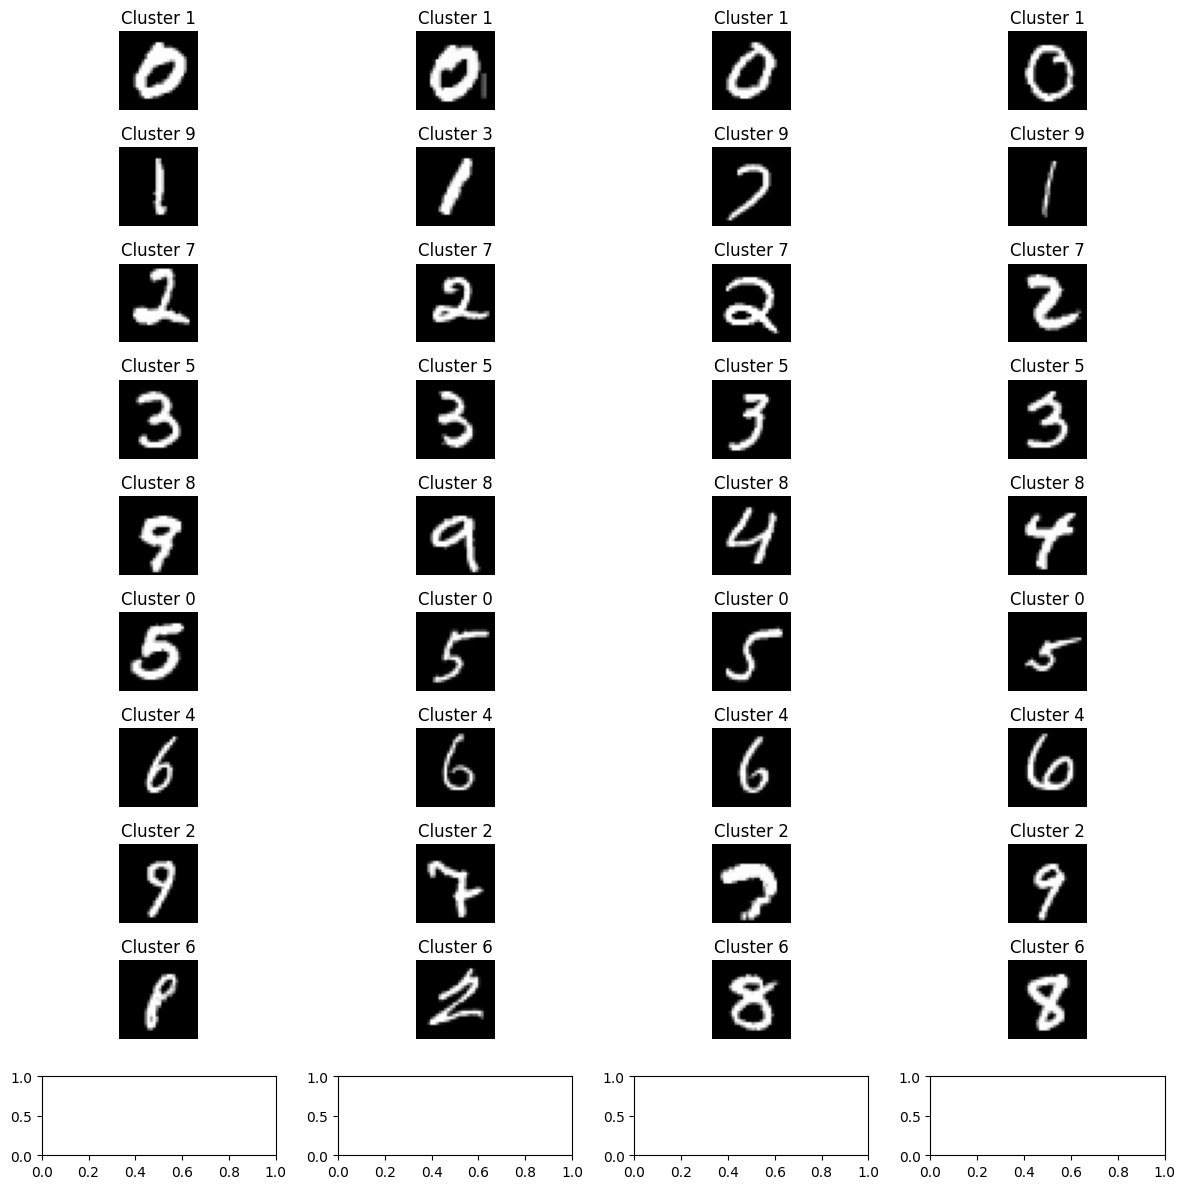

In [28]:
df = pd.DataFrame({'Cluster': reassigned_labels})
df['Index'] = df.index
selected_indices = []
for cluster_id in range(n_clusters):
    cluster_indices = df[df['Cluster'] == cluster_id]['Index'].tolist()
    print(cluster_indices)
    if len(cluster_indices) > 0:
        selected_indices.extend(random.sample(cluster_indices, 4))

fig, axes = plt.subplots(n_clusters, 4, figsize=(12, 12))
for i, idx in enumerate(selected_indices):
    row = i // 4
    col = i % 4
    image = X_train.iloc[idx].values.reshape(28, 28)  # Assuming MNIST images are 28x28 pixels
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Cluster {kmeansLabels[idx]}')

plt.tight_layout()
plt.show()